In [21]:
import json
import pprint
import requests
import pandas as pd
import datetime
import time
from loguru import logger
import collections
import pickle
import os
import pywebio
import builtins
#print = pprint.pprint

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [23]:
def build_api_url():
    """sport = nfl_api.SportAPI
    sport.choose_sport(nfl_api.SportAPI)
    url = sport.api_links(nfl_api.SportAPI)
    logger.info(print(url))
    return url"""

    initial_url = 'https://api.sportsdata.io/v3/nfl/scores/json/Scores/'
    key = '?key=1455ced235a74c71862688fb1a38dc7f'
    url = (initial_url + '2022' + key)
    if requests.get(url).status_code != 200:
        raise UrlStatusError
    return url

In [24]:
def download_nfl_data():
    delay = 0
    while True:
        try:
            response_stats = requests.get(build_api_url())
            logger.info('URL Access Successful')
        except UrlStatusError:
            if delay > 30:
                raise NflFeedNotAvailable
            delay += 5
            time.sleep(delay)
            continue
        else:
            break
    raw_data = json.loads(response_stats.text)
    number_games = (len(raw_data))
    #nfl_api.mongo_sports(raw_data)
    return raw_data

In [25]:
stadium_details = download_nfl_data()

2023-10-08 14:39:14.140 | INFO     | __main__:download_nfl_data:6 - URL Access Successful


In [26]:
stadium_details

[{'GameKey': '202210132',
  'SeasonType': 1,
  'Season': 2022,
  'Week': 1,
  'Date': '2022-09-08T20:20:00',
  'AwayTeam': 'BUF',
  'HomeTeam': 'LAR',
  'AwayScore': 35,
  'HomeScore': 11,
  'Channel': 'NBC',
  'PointSpread': 1.9,
  'OverUnder': 59.0,
  'Quarter': 'F',
  'TimeRemaining': None,
  'Possession': None,
  'Down': None,
  'Distance': 'Scrambled',
  'YardLine': None,
  'YardLineTerritory': None,
  'RedZone': None,
  'AwayScoreQuarter1': 9,
  'AwayScoreQuarter2': 4,
  'AwayScoreQuarter3': 9,
  'AwayScoreQuarter4': 16,
  'AwayScoreOvertime': 0,
  'HomeScoreQuarter1': 0,
  'HomeScoreQuarter2': 11,
  'HomeScoreQuarter3': 0,
  'HomeScoreQuarter4': 0,
  'HomeScoreOvertime': 0,
  'HasStarted': True,
  'IsInProgress': False,
  'IsOver': True,
  'Has1stQuarterStarted': True,
  'Has2ndQuarterStarted': True,
  'Has3rdQuarterStarted': True,
  'Has4thQuarterStarted': True,
  'IsOvertime': False,
  'DownAndDistance': None,
  'QuarterDescription': 'Final',
  'StadiumID': 54,
  'LastUpdated'

# Notes: testing
testing 

In [27]:
nfl = pd.DataFrame(stadium_details)

In [28]:
nfl

,GameKey,SeasonType,Season,Week,Date,AwayTeam,HomeTeam,AwayScore,HomeScore,Channel,PointSpread,OverUnder,Quarter,TimeRemaining,Possession,Down,Distance,YardLine,YardLineTerritory,RedZone,AwayScoreQuarter1,AwayScoreQuarter2,AwayScoreQuarter3,AwayScoreQuarter4,AwayScoreOvertime,HomeScoreQuarter1,HomeScoreQuarter2,HomeScoreQuarter3,HomeScoreQuarter4,HomeScoreOvertime,HasStarted,IsInProgress,IsOver,Has1stQuarterStarted,Has2ndQuarterStarted,Has3rdQuarterStarted,Has4thQuarterStarted,IsOvertime,DownAndDistance,QuarterDescription,StadiumID,LastUpdated,GeoLat,GeoLong,ForecastTempLow,ForecastTempHigh,ForecastDescription,ForecastWindChill,ForecastWindSpeed,AwayTeamMoneyLine,HomeTeamMoneyLine,Canceled,Closed,LastPlay,Day,DateTime,AwayTeamID,HomeTeamID,GlobalGameID,GlobalAwayTeamID,GlobalHomeTeamID,PointSpreadAwayTeamMoneyLine,PointSpreadHomeTeamMoneyLine,ScoreID,Status,GameEndDateTime,HomeRotationNumber,AwayRotationNumber,NeutralVenue,RefereeID,OverPayout,UnderPayout,HomeTimeouts,AwayTimeouts,DateTimeUTC,Attendance,IsClosed,StadiumDetails
0,202210132,1,2022,1,2022-09-08T20:20:00,BUF,LAR,35,11,NBC,1.9,59.0,F,None,None,NaN,Scrambled,NaN,None,None,9,4.0,9.0,16.0,0,0,11.0,0.0,0.0,0,True,False,True,True,True,True,True,False,None,Final,54,2023-03-14T13:49:50,None,None,89,90,Scattered Clouds,89,5,-148,124,False,True,Scrambled,2022-09-08T00:00:00,2022-09-08T20:20:00,4,32,18006,4,32,-134,-118,18006,Final,2022-09-08T23:10:00,513,512,None,23,-125,-127,NaN,NaN,2022-09-09T00:20:00,73846,True,"{'StadiumID': 54, 'Name': 'SoFi Stadium', 'City': 'Inglewood', 'State': 'CA', 'Country': 'USA', 'Capacity': 70240, 'PlayingSurface': 'Artificial', 'GeoLat': 33.95345, 'GeoLong': -118.3392, 'Type': 'Dome'}"
1,202210102,1,2022,1,2022-09-11T13:00:00,NO,ATL,31,30,FOX,7.1,49.9,F,None,None,NaN,Scrambled,NaN,None,None,9,0.0,4.0,19.0,0,4,15.0,9.0,4.0,0,True,False,True,True,True,True,True,False,None,Final,45,2023-03-14T13:49:50,None,None,70,71,Few Clouds,71,4,-272,226,False,True,Scrambled,2022-09-11T00:00:00,2022-09-11T13:00:00,22,2,18007,22,2,-125,-126,18007,Final,2022-09-11T16:14:34,518,516,None,59,-121,-131,NaN,NaN,2022-09-11T17:00:00,70078,True,"{'StadiumID': 45, 'Name': 'Mercedes-Benz Stadium', 'City': 'Atlanta', 'State': 'GA', 'Country': 'USA', 'Capacity': 71000, 'PlayingSurface': 'Artificial', 'GeoLat': 33.755556, 'GeoLong': -84.401, 'Type': 'RetractableDome'}"
2,202210105,1,2022,1,2022-09-11T13:00:00,CLE,CAR,30,27,CBS,-1.7,47.1,F,None,None,NaN,Scrambled,NaN,None,None,0,19.0,4.0,8.0,0,0,9.0,0.0,19.0,0,True,False,True,True,True,True,True,False,None,Final,26,2023-03-14T13:49:50,None,None,71,73,Broken Clouds,73,5,119,-141,False,True,Scrambled,2022-09-11T00:00:00,2022-09-11T13:00:00,8,5,18014,8,5,-125,-126,18014,Final,2022-09-11T16:19:11,522,521,None,94,-128,-123,NaN,NaN,2022-09-11T17:00:00,72205,True,"{'StadiumID': 26, 'Name': 'Bank of America Stadium', 'City': 'Charlotte', 'State': 'NC', 'Country': 'USA', 'Capacity': 74867, 'PlayingSurface': 'Artificial', 'GeoLat': 35.225833, 'GeoLong': -80.852778, 'Type': 'Outdoor'}"
3,202210106,1,2022,1,2022-09-11T13:00:00,SF,CHI,11,22,FOX,8.4,42.6,F,None,None,NaN,Scrambled,NaN,None,None,0,9.0,4.0,0.0,0,0,0.0,9.0,14.0,0,True,False,True,True,True,True,True,False,None,Final,20,2023-03-14T13:49:50,None,None,59,59,Light Rain,59,15,-319,260,False,True,Scrambled,2022-09-11T00:00:00,2022-09-11T13:00:00,31,6,18008,31,6,-125,-125,18008,Final,2022-09-11T16:06:08,527,526,None,66,-127,-124,NaN,NaN,2022-09-11T17:00:00,62159,True,"{'StadiumID': 20, 'Name': 'Soldier Field', 'City': 'Chicago', 'State': 'IL', 'Country': 'USA', 'Capacity': 61500, 'PlayingSurface': 'Grass', 'GeoLat': 41.86232, 'GeoLong': -87.616699, 'Type': 'Outdoor'}"
4,202210107,1,2022,1,2022-09-11T13:00:00,PIT,CIN,26,23,CBS,-7.9,50.5,F/OT,None,None,NaN,Scrambled,NaN,None,None,11,9.0,0.0,4.0,4,4,4.0,10.0,8.0,0,True,False,True,True,True,True,True,True,None,Final/OT,5,2023-03-14T13:49:50,None,None,61,66,Broken Clouds,66,6,289,-364,False,True,Scrambled,2022-09-11T00:00:00,2022-09-11T1

In [29]:
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GameKey                       271 non-null    object 
 1   SeasonType                    272 non-null    int64  
 2   Season                        272 non-null    int64  
 3   Week                          272 non-null    int64  
 4   Date                          272 non-null    object 
 5   AwayTeam                      272 non-null    object 
 6   HomeTeam                      272 non-null    object 
 7   AwayScore                     272 non-null    int64  
 8   HomeScore                     272 non-null    int64  
 9   Channel                       272 non-null    object 
 10  PointSpread                   272 non-null    float64
 11  OverUnder                     272 non-null    float64
 12  Quarter                       272 non-null    object 
 13  TimeR

In [30]:
nfl.describe()

,SeasonType,Season,Week,AwayScore,HomeScore,PointSpread,OverUnder,Down,YardLine,AwayScoreQuarter1,AwayScoreQuarter2,AwayScoreQuarter3,AwayScoreQuarter4,AwayScoreOvertime,HomeScoreQuarter1,HomeScoreQuarter2,HomeScoreQuarter3,HomeScoreQuarter4,HomeScoreOvertime,StadiumID,ForecastTempLow,ForecastTempHigh,ForecastWindChill,ForecastWindSpeed,AwayTeamMoneyLine,HomeTeamMoneyLine,AwayTeamID,HomeTeamID,GlobalGameID,GlobalAwayTeamID,GlobalHomeTeamID,PointSpreadAwayTeamMoneyLine,PointSpreadHomeTeamMoneyLine,ScoreID,HomeRotationNumber,AwayRotationNumber,RefereeID,OverPayout,UnderPayout,HomeTimeouts,AwayTimeouts,Attendance
count,272.0,272.0,272.000000,272.000000,272.000000,272.000000,272.000000,1.0,1.0,272.000000,271.000000,271.000000,271.000000,272.000000,272.00000,271.000000,271.000000,271.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.00000,272.000000,272.000000,272.000000,272.000000,272.00000,272.000000,272.000000,272.000000,272.000000,272.000000,1.0,1.0,272.000000
mean,1.0,2022.0,9.477941,23.694853,25.941176,-1.656250,50.027574,1.0,48.0,4.816176,7.826568,5.538745,6.985240,0.191176,5.37500,9.136531,5.535055,7.402214,0.161765,21.139706,50.963235,52.904412,49.511029,6.580882,48.294118,-128.525735,17.698529,17.801471,18132.93750,17.698529,17.801471,-125.102941,-124.180147,18132.93750,391.606618,390.496324,56.882353,-125.507353,-125.474265,4.0,3.0,69186.779412
std,0.0,0.0,5.307471,10.597583,10.453739,6.800936,4.823973,NaN,NaN,4.678919,5.513233,5.109665,6.052836,1.096891,4.89361,6.172204,5.243485,5.955750,0.927008,15.841313,17.400177,17.254500,20.457495,3.795618,302.416360,346.206334,10.382230,10.530097,80.95974,10.382230,10.530097,14.921086,14.881100,80.95974,145.719679,145.715565,38.801046,1.352850,1.408749,NaN,NaN,8115.736877
min,1.0,2022.0,1.000000,0.000000,4.000000,-19.300000,36.300000,1.0,48.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000,-1.000000,-19.000000,0.000000,-1092.000000,-2239.000000,1.000000,1.000000,17995.00000,1.000000,1.000000,-137.000000,-140.000000,17995.00000,116.000000,115.000000,1.000000,-129.000000,-131.000000,4.0,3.0,0.000000
25%,1.0,2022.0,5.000000,17.000000,18.750000,-5.700000,46.500000,1.0,48.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,4.000000,0.000000,3.500000,0.000000,8.000000,39.000000,40.000000,36.750000,4.000000,-174.000000,-263.250000,8.750000,8.750000,18063.75000,8.750000,8.750000,-127.000000,-126.000000,18063.75000,297.000000,296.000000,23.000000,-127.000000,-127.000000,4.0,3.0,65878.000000
50%,1.0,2022.0,9.500000,23.000000,26.000000,-2.800000,49.900000,1.0,48.0,4.000000,9.000000,4.000000,8.000000,0.000000,4.00000,9.000000,4.000000,9.000000,0.000000,18.000000,52.000000,54.000000,52.000000,6.000000,140.500000,-166.500000,16.000000,19.000000,18131.50000,16.000000,19.000000,-125.000000,-125.000000,18131.50000,364.000000,363.000000,53.000000,-125.000000,-125.000000,4.0,3.0,69185.000000
75%,1.0,2022.0,14.000000,31.000000,32.000000,3.900000,53.300000,1.0,48.0,9.000000,11.000000,9.000000,10.000000,0.000000,9.00000,11.000000,9.000000,10.000000,0.000000,29.000000,63.000000,66.000000,64.000000,9.000000,218.250000,144.750000,26.000000,28.000000,18202.25000,26.000000,28.000000,-125.000000,-124.000000,18202.25000,529.000000,528.000000,94.000000,-125.000000,-125.000000,4.0,3.0,71620.750000
max,1.0,2022.0,18.000000,54.000000,61.000000,15.900000,62.400000,1.0,48.0,19.000000,27.000000,19.000000,32.000000,8.000000,19.00000,32.000000,27.000000,37.000000,8.000000,55.000000,91.000000,94.000000,91.000000,23.000000,1088.000000,712.000000,35.000000,35.000000,18274.00000,35.000000,35.000000,114.000000,114.000000,18274.00000,556.000000,555.000000,119.000000,-121.000000,-121.000000,4.0,3.0,93843.000000


In [31]:
scores = nfl[['AwayScore', 'HomeScore']]
differences = nfl['AwayScore'] - nfl['HomeScore']

In [32]:
differences

0      24
1       1
2       3
3     -11
4       3
5       3
6       0
7     -14
8      17
9      -7
10     26
11     -5
12    -17
13      1
14     18
15     -1
16     -4
17      5
18      1
19    -10
20    -27
21     12
22     -4
23      3
24     -4
25    -22
26     -4
27     -8
28      7
29    -20
30    -38
31    -18
32    -14
33     -9
34     -3
35     -4
36     -2
37     -5
38     12
39     17
40     -2
41     17
42     32
43      9
44      5
45      2
46     -1
47      8
48    -14
49      4
50     -3
51      3
52    -17
53      3
54     12
55      8
56     -9
57     -9
58      4
59     12
60     -4
61    -10
62     12
63    -17
64      4
65      6
66    -39
67      2
68      7
69     -8
70    -33
71     -8
72    -26
73     -7
74      5
75     25
76      4
77     14
78     -3
79     -1
80      5
81    -16
82     26
83     20
84     -8
85      9
86      4
87     -4
88     -3
89    -16
90    -12
91      4
92    -11
93     -4
94     -9
95     -3
96    -20
97    -21
98    -19
99      7


<Axes: >

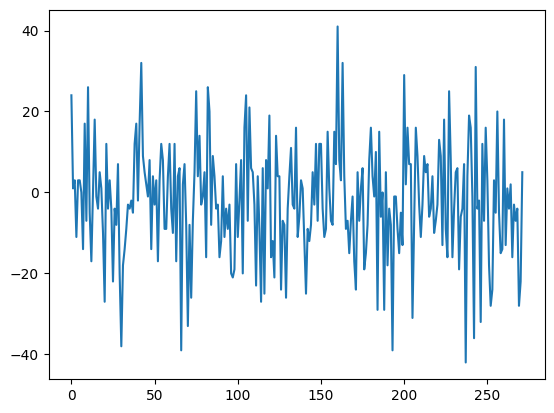

In [33]:
differences.plot()